In [1]:
import pandas as pd
from pydataset import data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"A:\my_codes\my_project\Supervised Machine Learning\Classification\Naive-Bayes\Energy Efficiency Classification\energy_efficiency_data.csv")

In [3]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df['Cooling_Load'].value_counts().sort_index()

Cooling_Load
10.90    1
10.94    1
11.17    1
11.19    1
11.27    1
        ..
46.44    1
46.94    1
47.01    1
47.59    1
48.03    1
Name: count, Length: 636, dtype: int64

In [6]:
df.head(10)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [7]:
# Prepare features and categorical target for classification
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
         'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
# Bin Cooling_Load (continuous) into 3 categories: Low, Medium, High
y = pd.cut(df['Cooling_Load'], bins=3, labels=['Low', 'Medium', 'High'])

print('Features shape:', X.shape)
print('Target distribution:')
print(y.value_counts())

Features shape: (768, 8)
Target distribution:
Cooling_Load
Low       391
Medium    259
High      118
Name: count, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [10]:
pred = model.predict(X_test)
pred

array(['Low', 'Low', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'Low',
       'Medium', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Medium', 'High', 'High', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'Low',
       'Low', 'Low', 'Medium', 'High', 'Medium', 'Low', 'Low', 'Medium',
       'Low', 'Low', 'High', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'High', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Medium',
       'Low

In [11]:
accuracy_score(y_test, pred)

0.8831168831168831

In [12]:
cm = confusion_matrix(y_test, pred)
cm

array([[15,  0,  9],
       [ 0, 72,  1],
       [ 8,  0, 49]])

In [13]:
# Get the class labels from the model
labels = model.classes_
print("Model classes:", labels)

Model classes: ['High' 'Low' 'Medium']


In [14]:
cm = confusion_matrix(y_test, pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

<Figure size 1000x800 with 0 Axes>

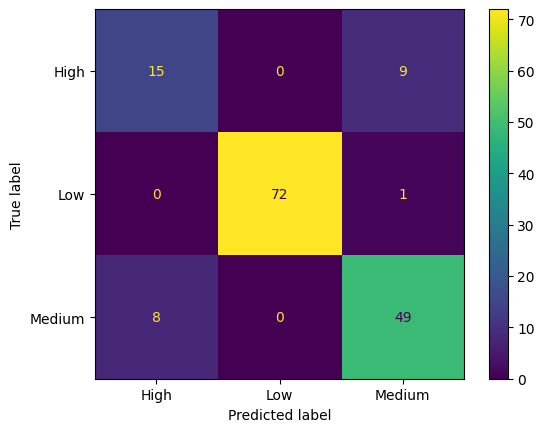

In [15]:
plt.figure(figsize=(10,8))
disp.plot()
plt.show()

In [16]:
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.883
